In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
base_dir = '/data/erin/20190520_cohort_run/'

# get names of each, clean up for subsequent saving
folders = os.listdir(base_dir)
folders = [folder for folder in folders if 'Point' in folder]
folders.sort()

# load all data into a single numpy array
data = np.zeros((len(folders), 1024, 1024, 2), dtype='float32')
for i in range(len(folders)):
    data[i, :, :, 0] = io.imread(os.path.join(base_dir, folders[i], 'Nuclear_Interior_Channel.tif'))
    data[i, :, :, 1] = io.imread(os.path.join(base_dir, folders[i], 'Cell_Border_Channel.tif'))
    
eval_data = data

In [11]:
np.save(base_dir + 'Nuclear_Border_Channel_Input', data)

In [6]:
CHANNEL_AXIS = 3
eval_data = np.load(os.path.join('/data/kausi',"20190517_brain_cohort_nuclear_only/" + "Nuclear_Channel_Input.npy"))
eval_data = np.expand_dims(eval_data, axis=-1)


In [12]:
MODEL_NAME = 'Point1_12_18_3X_interior_border_deepcell_old_epoch_30'
weights_path = os.path.join('/data/models/20190505_deepcell_old', 
                            MODEL_NAME + ".h5")

In [14]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=128,
    n_conv_filters=32,
    dilated=True,
    n_features=3,
    norm_method='std',
    receptive_field=61,
    n_channels=1,    
    input_shape=tuple(eval_data.shape[1:]))

run_sample_model.load_weights(weights_path)

In [38]:
test_images = run_sample_model.predict(eval_data[80:90, ...])

print('model output shape:', test_images.shape)

model output shape: (9, 1024, 1024, 3)


In [39]:
np.save('/data/erin/20190520_cohort_run/' + 'model_output_80.90', test_images)

In [4]:
data_deep = np.zeros((len(folders), 1024, 1024, 3), dtype='float32')
data_deep[0:10, ...] = np.load(base_dir + 'model_output_0.10.npy')
data_deep[10:20, ...] = np.load(base_dir + 'model_output_10.20.npy')
data_deep[20:30, ...] = np.load(base_dir + 'model_output_20.30.npy')
data_deep[30:40, ...] = np.load(base_dir + 'model_output_30.40.npy')
data_deep[40:50, ...] = np.load(base_dir + 'model_output_40.50.npy')
data_deep[50:60, ...] = np.load(base_dir + 'model_output_50.60.npy')
data_deep[60:70, ...] = np.load(base_dir + 'model_output_60.70.npy')
data_deep[70:80, ...] = np.load(base_dir + 'model_output_70.80.npy')
data_deep[80:90, ...] = np.load(base_dir + 'model_output_80.90.npy')
data_deep.shape



(89, 1024, 1024, 3)

In [45]:
print(os.path.join(base_dir, 'segmentation_masks', folders[i] + 'nuc_border.tiff'))

/data/erin/20190520_cohort_run/segmentation_masks/Point9nuc_border.tiff


In [6]:
# save back to same folder structure
# save images back to folder for viewing from regular network
for i in range(len(folders)):
    if data_deep.shape[-1] == 3:
        # three category network
        border_idx = 0
        nuc_idx = 1
        os.mkdir(os.path.join(base_dir, '20190520_nuc_border_cnn_output', folders[i]))
        io.imsave(os.path.join(base_dir, '20190520_nuc_border_cnn_output', folders[i], 'nuc_interior.tiff'), data_deep[i, :, :, nuc_idx])
        io.imsave(os.path.join(base_dir, '20190520_nuc_border_cnn_output', folders[i], 'nuc_border.tiff'), data_deep[i, :, :, border_idx])
    else:
        # 4 category network
        border_idx = [0, 1]
        nuc_idx = 2
        io.imsave(os.path.join(image_dir, names[i] + '_nucleus.tiff'), data[i, 3, :, :, nuc_idx])
        io.imsave(os.path.join(image_dir, names[i] + '_border.tiff'),
                  data[i, 3, :, :, border_idx[0]] + data[i, 3, :, :, border_idx[1]])


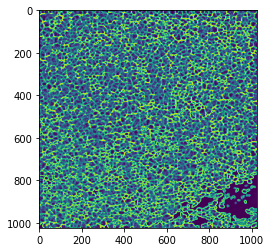

In [62]:
folders[8]
plt.imshow(data_deep[8, :, :, 0])

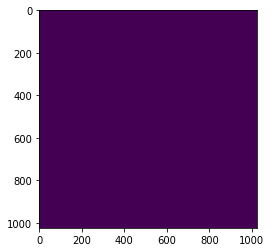

In [57]:
# import copy
# test_2 = copy.copy(test_images)
x = plt.imread('/data/erin/20190520_cohort_run/cnn_output/Point40/feature_1_frame_0.tif')
#test_2 = np.load('/data/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')

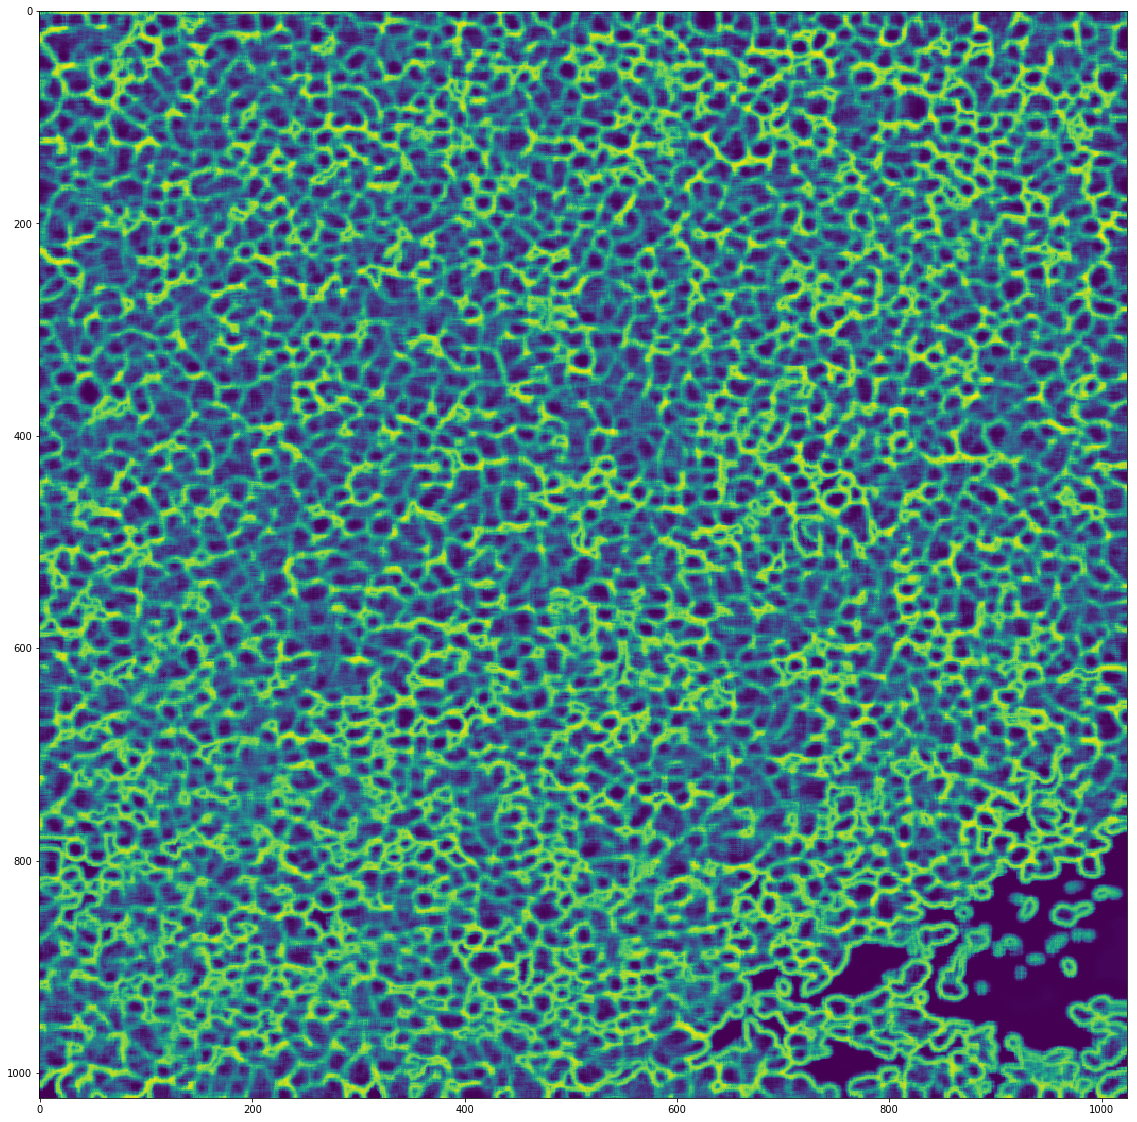

In [63]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
plt.imshow(data_deep[8, :, :, 0])
